# ME 609 : Optimisational Methods in Engineering
##     Project - Phase 3
##     Constrained Optimisation Problem
## MultiVariable : Conjugate Direction Method
## Unidirectional Search : Bounding Phase, Newton Raphson
##   
###   Nirmal S.   [234103107]
###   Rohit Kumar Saragadam [234103109]

In [468]:
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
from matplotlib import ticker

### Function Value

In [469]:
def bracket_operator(f):
    return(min(0, f))

In [480]:
math.sin()

0.0

In [552]:
def objectiveFunction(df_x, df_s, alpha, N, R):
    
    global f_count     # Keeping Track of number of times the function is read
    f_count += 1
    
    
    ########## Problem 1 ##########
    x1 = df_x[1] + alpha*df_s[1]
    x2 = df_x[2] + alpha*df_s[2]
    value = 0
    fx = (x1 - 10)**3 + (x2 - 20)**3
    
    g1x = (x1 - 5)**2 + (x2 - 5)**2 - 100
    g2x = -((x1 - 6)**2 + (x2 - 5)**2 - 82.81)
    
    value = (fx + R*(bracket_operator(g1x))**2 
                + R*(bracket_operator(g2x))**2)
    
#    ########## Problem 2 ##########
#     x1 = df_x[1] + alpha*df_s[1]
#     x2 = df_x[2] + alpha*df_s[2]
#     value = 0
#     fx = ((math.sin(2*math.pi*x1)**3)*(math.sin(2*math.pi*x2))
#           /((x1)**3*(x1 + x2)))

#     g1x = -(x1**2 - x2 + 1)
#     g2x = -(1 - x1 + (x2 - 4)**2)
    
#     value = (fx + R*(bracket_operator(g1x))**2 
#                 + R*(bracket_operator(g2x))**2)
    
#    ########## Problem 3 ##########
#     x1 = df_x[1] + alpha*df_s[1]
#     x2 = df_x[2] + alpha*df_s[2]
#     x3 = df_x[3] + alpha*df_s[3]
#     x4 = df_x[4] + alpha*df_s[4]
#     x5 = df_x[5] + alpha*df_s[5]
#     x6 = df_x[6] + alpha*df_s[6]
#     x7 = df_x[7] + alpha*df_s[7]
#     x8 = df_x[8] + alpha*df_s[8]

#     value = 0
#     fx = x1 + x2 + x3
    
#     g1x = -1 + 0.0025*(x4 + x6)
#     g2x = -1 + 0.0025*(-x4 + x5 + x7)
#     g3x = -1 + 0.01*(-x6 + x8)
#     g4x = 100*x1 - x1*x6 + 833.33252*x4 - 83333.333
#     g5x = x2*x4 - x2*x7 - 1250*x4 + 1250*x5
#     g6x = x3*x5 - x3*x8 - 2500*x5 + 1250000
    
#     value = (fx + R*(bracket_operator(g1x))**2 
#                 + R*(bracket_operator(g2x))**2
#                 + R*(bracket_operator(g3x))**2
#                 + R*(bracket_operator(g4x))**2
#                 + R*(bracket_operator(g5x))**2
#                 + R*(bracket_operator(g6x))**2)


#     ########## Himmelblau Function ##########
#     x1 = df_x[1] + alpha*df_s[1]
#     x2 = df_x[2] + alpha*df_s[2]
#     value = 0
    
#     fx = (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2
#     g1x = (x1 - 5)**2 + (x2)**2 - 26
    
#     value = fx + R*(bracket_operator(g1x))**2
    

    return value

### Unidirectional Search Algorithm Function

In [471]:
def uniDirectionalSearch(a, b, df_x, df_s):
    
    ########### INPUTS TO BOUNDING PHASE AND NEWTON RAPHSON ##########
    alpha = a
    delta = 1e-3
    
    h = 1e-4
    epsilon = 1e-5
    
    ########### BOUNDING PHASE METHOD ##########
    
    #### STEP 1 ####
    k = 0
    
    #### STEP 2 ####
    f_x = objectiveFunction(df_x, df_s, alpha, N, R)
    f_x_plus_delta  = objectiveFunction(df_x, df_s, alpha+delta, N, R)
    f_x_minus_delta = objectiveFunction(df_x, df_s, alpha-delta, N, R)
    if (f_x_minus_delta < f_x and f_x < f_x_plus_delta):
        delta = -delta
    alpha_prev = alpha

    while True:
        
        #### STEP 3 ####
        if k > 50:
            k = 50
        alpha_new = alpha + (2**k)*delta
        f_x_new = objectiveFunction(df_x, df_s, alpha_new, N, R)
        
        # if new guess goes beyond 'b'
        if alpha_new > b:    
            alpha_new = b
            f_x_new = objectiveFunction(df_x, df_s, alpha_new, N, R)
            if f_x_new >= f_x:
                a1 = alpha_prev 
                b1 = alpha_new
                break
            else:
                a1 = alpha 
                b1 = alpha_new
                break
                
        # if new guess goes below 'a'
        if alpha_new < a:    
            alpha_new = a
            f_x_new = objectiveFunction(df_x, df_s, alpha_new, N, R)
            if f_x_new >= f_x:
                b1 = alpha_prev 
                a1 = alpha_new
                break
            else:
                b1 = alpha 
                a1 = alpha_new
                break
        
        #### STEP 4 ####
        if f_x_new >= f_x:
            if delta < 0:
                b1 = alpha_prev 
                a1 = alpha_new
            else:
                a1 = alpha_prev 
                b1 = alpha_new
            break

        k += 1
        alpha_prev = alpha
        alpha = alpha_new
        f_x = f_x_new
    
    
    
    ########### NEWTON RAPHSON METHOD ##########
    
    #### STEP 1 ####
    k = 1
    alpha = b1
    f_d1 = ((objectiveFunction(df_x, df_s, alpha + h, N, R) 
             - objectiveFunction(df_x, df_s, alpha - h, N, R))
             /(2*h))
    
    while True:
        #### STEP 2 ####
        f_d2 = ((objectiveFunction(df_x, df_s, alpha + h, N, R)
                 - 2*objectiveFunction(df_x, df_s, alpha, N, R)
                 + objectiveFunction(df_x, df_s, alpha - h, N, R))
                /h**2)
        
        #### STEP 3 ####
        alpha_new = alpha - f_d1/f_d2
        f_new_d1 = ((objectiveFunction(df_x, df_s, alpha_new + h, N, R) 
                     - objectiveFunction(df_x, df_s, alpha_new - h, N, R))
                     /(2*h))
        
        #### STEP 4 ####
        
        if(alpha_new<a1):
            alpha_new = a1
            return df_x + alpha_new*df_s, [alpha_new]
            break
        if(alpha_new>b1):
            alpha_new = b1
            return df_x + alpha_new*df_s, [alpha_new]
            break
        
        if abs(f_new_d1) > epsilon:
            alpha = alpha_new
            f_d1 = f_new_d1
            continue
        
        else:
            return df_x + alpha_new*df_s, [alpha_new]

### Finding Bounds of Alpha

In [472]:
def findBound(bound, df_x, df_s):
    min_max = pd.DataFrame(np.zeros((N,2)), index=range(1,N+1), columns=range(1,3))
    min_max[1] = -1e6
    min_max[2] = 1e6
        
    for bound_i in range(1, N+1):
        if abs(df_s[bound_i]) < 1e-6:
            continue
        else:
            min_max[1][bound_i] = (bound[bound_i-1][0] - df_x[bound_i])/df_s[bound_i]
            min_max[2][bound_i] = (bound[bound_i-1][1] - df_x[bound_i])/df_s[bound_i]
            
            if min_max[1][bound_i] > min_max[2][bound_i]:  # Swapping the left and right limits based on ascending order
                temp = min_max[1][bound_i]
                min_max[1][bound_i] = min_max[2][bound_i]
                min_max[2][bound_i] = temp
            
    return(max(min_max[1]), min(min_max[2]))

### Powel Conjugate Method

In [473]:
def conjugate_direction(df_x, R, N):
    
    df_x = df_x[[0]]
    
    # Calculation of 'n'th point
    n = 1
    
    # Creating the initial set of conjugate directions (Identity matrix)
    df_s = pd.DataFrame(np.identity(N), columns=range(1,N+1), index=range(1, N+1))

    # Setting Value of Termination Checks
    epsilon = 1e-6    # magnitude of 'd'
    theta = 5    # angle in degrees

    # DataFrame to set store alpha values of each direction
    df_alpha = pd.DataFrame()

    while True:

        #### STEP 2 ####
        # Running unidirectional searches for s1, s2, ..., sN
        for i in range(1, N+1):
            a1, b1 = findBound(bound, df_x[n-1], df_s[i])
            print(a1, b1)
            print(df_x[n-1].values)
            print(df_s[i].values)
            df_x[n], df_alpha[n] = uniDirectionalSearch(a1, b1, df_x[n-1], df_s[i])
            n += 1
        #Running one more unidirectional search along s1
        a1, b1 = findBound(bound, df_x[n-1], df_s[1])
        print(a1, b1)
        print(df_x[n-1].values)
        print(df_s[1].values)
        df_x[n], df_alpha[n] = uniDirectionalSearch(a1, b1, df_x[n-1], df_s[1])

        #### STEP 3 ####
        # Finding New conjugate Direction and it's magnitude
        d_new = df_x[n] - df_x[n-N]

        # Magnitude
        mod_d = 0
        for i in range(1, N+1):
            mod_d += d_new[i]**2
        mod_d = math.sqrt(mod_d)

        # Linear Dependency
        cos_sum_temp = 90
        for j in range(1, N+1):
            cos_sum = 0
            for i in range(1, N+1):
                cos_sum += (d_new/mod_d)[i] * df_s[j][i]
            cos_sum = 180/math.pi*math.acos(cos_sum)
            if(cos_sum>90):
                cos_sum = 180 - cos_sum
            if cos_sum > cos_sum_temp:
                cos_sum = cos_sum_temp
            else:
                cos_sum_temp = cos_sum
  
        n += 1
        
        #### STEP 4 ####
        # Checking for Termination    
        if (mod_d > epsilon and cos_sum > theta):
            # Updating the search directions
            df_s.columns += 1
            df_s[1] = d_new/mod_d
            no_col = len(df_s.columns)
            df_s = df_s[range(1, no_col+1)]
        else:
            break
            
    return(df_x)

### Reading the initial point and the boundary from the input file

In [555]:
df_x = pd.DataFrame()     # To store values of each point

with open("Input_File.txt") as f:
    
    contents = f.read()
    
    x_start = contents.find("(") + 1
    x_end   = contents.find(")")
    
    bound_start = contents.find("[") + 1
    bound_end   = contents.find("]")
    
    # Storing initial point in dataframe and resetting index
    df_x[0] = np.array(contents[x_start:x_end].split(', '), dtype='float')
    df_x.index += 1
    
    # Extracting the number of variables in the input file
    N = len(df_x)
    
    # Reading the boundary of every variable
    bounds = contents[bound_start:bound_end].split('; ')
    bound = np.array(bounds[0].split(', '), dtype='float')
    for i in range(N-1):
        bound = np.vstack([bound, np.array(bounds[i+1].split(', '), dtype='float')])
    
    f.close()
    
    
print('The Initial Guess is \n', df_x[0].values)
print('\nThe bounds are')
for i in range(N):
    print('x%d E [%.1f, %.1f]' %(i+1, bound[i][0], bound[i][1]))

print('\nNumber of Variables : ', N)

The Initial Guess is 
 [0. 0.]

The bounds are
x1 E [13.0, 20.0]
x2 E [0.0, 4.0]

Number of Variables :  2


# Constrained Optimisation with Penalty Method

In [556]:
df_s = pd.DataFrame(np.identity(N), columns=range(1,N+1), index=range(1, N+1))
df_record = pd.DataFrame(columns=['Sequence(t)', 'R(t)', 'x(t)', 'P(x(t), R(t))'])

# Counting Number of function Evaluation:        ## To be moved to the Main Function
f_count = 0

##### STEP 1 ##### 
R = 0.1
epsilon = 1e-3
c = 10
k = 1
row_counter = 0
####### STEP 2 (penalty function defined in the objective_function) 


while True:
    ##### STEP 3 #####
    df_x2 = conjugate_direction(df_x, R, N)
    df_temp = df_x2[[df_x2.columns.max()]].rename(columns={df_x2.columns.max():0})
    
    #### Recording Data #####
    Pk = objectiveFunction(df_temp[0], df_s[1], 0, N, R)
    f_count -= 1
    for i in range(len(df_x2.columns)):
        df_record.loc[row_counter, 'Sequence(t)'] = k
        df_record.loc[row_counter, 'R(t)'] = R
        string = '('
        for j in range(1, len(df_x2.index)+1):
            string += str(round(df_x2[i][j],4))
            if j!=len(df_x2.index):
                string += ', '
            else:
                string += ')'
        df_record.loc[row_counter, 'x(t)'] = string
        Pk_2 = objectiveFunction(df_x2[i], df_s[1], 0, N, R)
        f_count -= 1
        df_record.loc[row_counter, 'P(x(t), R(t))'] = Pk_2
        row_counter += 1
    print("\n********** Sequence %d **********************" %k)
    print("R(t): %.1f,   P(x,R): %.4f,    fun_eval: %d" %(R, Pk, f_count))
    string = '('
    for j in range(1, len(df_x2.index)+1):
        string += str(round(df_x2[i][j],4))
        if j!=len(df_x2.index):
            string += ', '
        else:
            string += ')'
    print("x(t): ", string)
    
    
    ##### STEP 4 #####
    # Compare P(k) vs P(k-1)
    if(k!=1 and abs(Pk - Pk_prev)<epsilon):
        break
    
    ##### STEP 5 #####
    R = c*R
    df_x = df_temp
    Pk_prev = Pk
    k = k+1

13.0 20.0
[0. 0.]
[1. 0.]
0.0 4.0
[13.12356283  0.        ]
[0. 1.]
-0.12356283040501914 6.876437169594981
[13.12356283  0.        ]
[1. 0.]

********** Sequence 1 **********************
R(t): 0.1,   P(x,R): -7961.4106,    fun_eval: 68
x(t):  (13.1236, 0.0)
-0.12356283040501737 6.876437169594983
[13.12356283  0.        ]
[1. 0.]
0.0 4.0
[13.59489959  0.        ]
[0. 1.]
-0.5948995931739898 6.40510040682601
[13.59489959  0.        ]
[1. 0.]

********** Sequence 2 **********************
R(t): 1.0,   P(x,R): -7952.2703,    fun_eval: 140
x(t):  (13.5949, 0.0)
-0.5948995931739898 6.40510040682601
[13.59489959  0.        ]
[1. 0.]
0.0 4.0
[13.63158499  0.        ]
[0. 1.]
-0.6315849902014161 6.368415009798584
[13.63158499  0.        ]
[1. 0.]

********** Sequence 3 **********************
R(t): 10.0,   P(x,R): -7947.7892,    fun_eval: 212
x(t):  (13.6316, 0.0)
-0.6315849902010235 6.3684150097989765
[13.63158499  0.        ]
[1. 0.]
0.0 4.0
[13.63493616  0.        ]
[0. 1.]
-0.6349361572108005

KeyboardInterrupt: 

In [467]:
R = 0.1

objectiveFunction(pd.Series([0, 0.121212]).set_axis([1,2]), df_s[1], 0, N, R)

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


nan

In [557]:
# df_record.to_csv('Record.csv', index=False)

df_record

,Sequence(t),R(t),x(t),"P(x(t), R(t))"
0,1,0.1,"(0.0, 0.0)",-8750
1,1,0.1,"(13.1236, 0.0)",-7961.41
2,1,0.1,"(13.1236, 0.0)",-7961.41
3,1,0.1,"(13.1236, 0.0)",-7961.41
4,2,1,"(13.1236, 0.0)",-7888.39
5,2,1,"(13.5949, 0.0)",-7952.27
6,2,1,"(13.5949, 0.0)",-7952.27
7,2,1,"(13.5949, 0.0)",-7952.27
8,3,10,"(13.5949, 0.0)",-7940.82
9,3,10,"(13.6316, 0.0)",-7947.79


In [593]:
## Constraints ###
X_q = np.linspace(bound[0][0], bound[0][1], 100)

### Problem 1 ###
Y_1a = np.zeros(100)
Y_1b = np.zeros(100)
for i in range(100):
    if (100 - (X_q[i] - 5)**2 >= 0) and (5 - math.sqrt(100 - (X_q[i] - 5)**2) >= bound[1][0]) and (5 - math.sqrt(100 - (X_q[i] - 5)**2) <= bound[1][1]):
        Y_1a[i] = 5 - math.sqrt(100 - (X_q[i] - 5)**2)
    else : 
        Y_1a[i] = np.nan
    if (82.81 - (X_q[i] - 6)**2 >= 0)  and (5 - math.sqrt(82.81 - (X_q[i] - 6)**2) >= bound[1][0]) and (5 - math.sqrt(82.81 - (X_q[i] - 6)**2) <= bound[1][1]):
        Y_1b[i] = 5 - math.sqrt(82.81 - (X_q[i] - 6)**2)
    else:
        Y_1b[i] = np.nan



## Problem 2 ###
# Y_2a = np.zeros(100)
# Y_2b1 = np.zeros(100)
# Y_2b2 = np.zeros(100)
# for i in range(100):
#     if X_q[i]**2 + 1 <= bound[1][1]:
#         Y_2a[i] = X_q[i]**2 + 1
#     else:
#         Y_2a[i] = np.nan
#     if X_q[i] - 1 >= 0:
#         Y_2b1[i] = 4 + math.sqrt(X_q[i] - 1)
#         Y_2b2[i] = 4 - math.sqrt(X_q[i] - 1)
#     else:
#         Y_2b1[i] = np.nan
#         Y_2b2[i] = np.nan

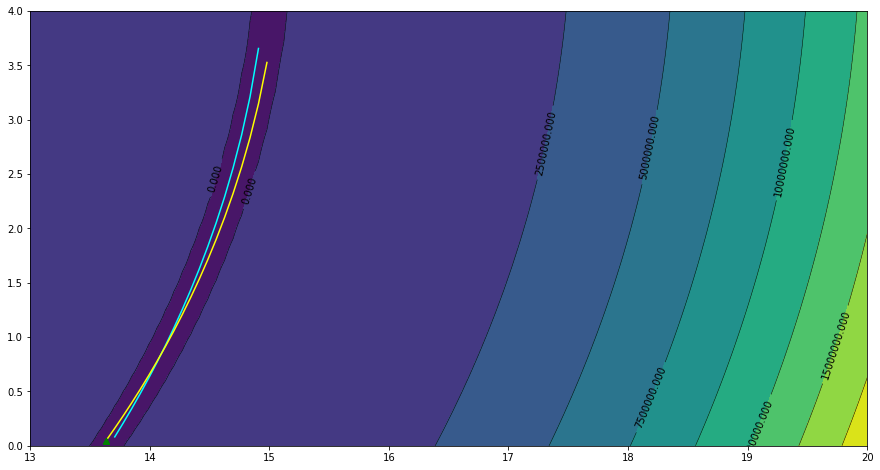

In [630]:
R = 1000

DOMAIN = np.zeros((100,100))

X = np.linspace(bound[0][0], bound[0][1], 100)
Y = np.linspace(bound[1][0], bound[1][1], 100)

for i in range(100):
    for j in range(100):
        temp = pd.Series([X[i], Y[j]]).set_axis([1,2])
        DOMAIN[i][j] = objectiveFunction(temp, df_s[1], 0, 2, R)
        
# fig, ax = plt.subplots(figsize=(10,10))        
fig, ax = plt.subplots(figsize=(15,8))
cnt = ax.contour(X, Y, DOMAIN.transpose(), colors = "k", linewidths = 0.5)
ax.clabel(cnt, cnt.levels, inline = True, fontsize = 10)
ax.contourf(X, Y, DOMAIN.transpose())

### Problem 1 ###
ax.plot(X_q, Y_1a, color='aqua')
ax.plot(X_q, Y_1b, color='yellow')

### Problem 2 ###
# ax.plot(X_q, Y_2a, color='aqua')
# ax.plot(X_q, Y_2b1, color='yellow')
# ax.plot(X_q, Y_2b2, color='yellow')


x_1 = df_record.loc[df_record['R(t)']==R,'x(t)'].apply(lambda x: x.replace('(','').replace(')','').split(',')[0])
x_2 = df_record.loc[df_record['R(t)']==R,'x(t)'].apply(lambda x: x.replace('(','').replace(')','').split(',')[1])
for i in x_1.index:
    for j in X:
        if float(x_1[i]) < j:
            x_1[i] = j
            break
            
for i in x_2.index:
    for j in Y:
        if float(x_2[i]) < j:
            x_2[i] = j
            break
ax.plot(x_1, x_2, '-^', color='green')

# plt.xlim(13, 16)
# plt.ylim(0, 1)

In [572]:
df_record

,Sequence(t),R(t),x(t),"P(x(t), R(t))"
0,1,0.1,"(0.0, 0.0)",-8750
1,1,0.1,"(13.1236, 0.0)",-7961.41
2,1,0.1,"(13.1236, 0.0)",-7961.41
3,1,0.1,"(13.1236, 0.0)",-7961.41
4,2,1,"(13.1236, 0.0)",-7888.39
5,2,1,"(13.5949, 0.0)",-7952.27
6,2,1,"(13.5949, 0.0)",-7952.27
7,2,1,"(13.5949, 0.0)",-7952.27
8,3,10,"(13.5949, 0.0)",-7940.82
9,3,10,"(13.6316, 0.0)",-7947.79
